# Procesamiento de señales

> - El procesamiento de señales es el campo científico que implica la manipulación de señales desde el dominio temporal al de frecuencia y viceversa, suavizando la señal, separando el ruido de la señal (es decir, filtrándola) y extrayendo información de la señal.

> - Las señales que existen en la naturaleza son señales continuas. Las señales de tiempo continuo (o analógicas) existen para el intervalo continuo (t1, t2) que puede variar desde $-\infty$ to $+\infty$
>
> - $f_{max}$

# Fundamentos de un sistema procesador de señales

> - Dado que las computadoras necesitan señales digitales para su procesamiento, para poder usar una señal analógica en una computadora, esta debe digitalizarse con un conversor analógico-digital. Por lo tanto, se necesita una interfaz entre la señal analógica y el procesador de señales digitales.

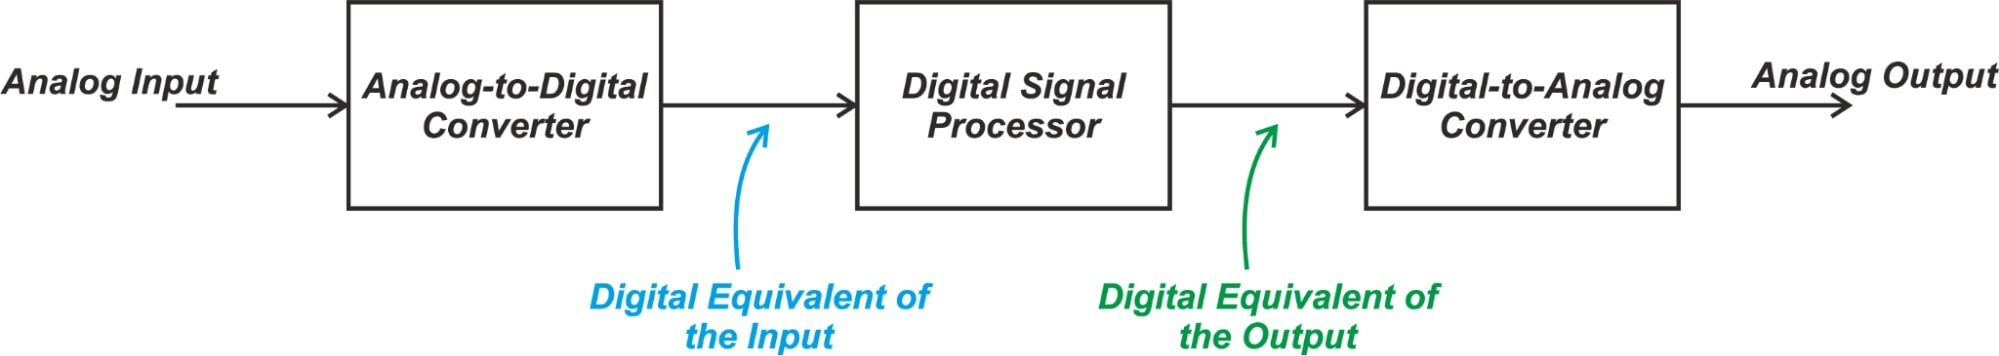

[Source](https://www.allaboutcircuits.com/technical-articles/an-introduction-to-digital-signal-processing/)

# Conversión análogo a digital de señales

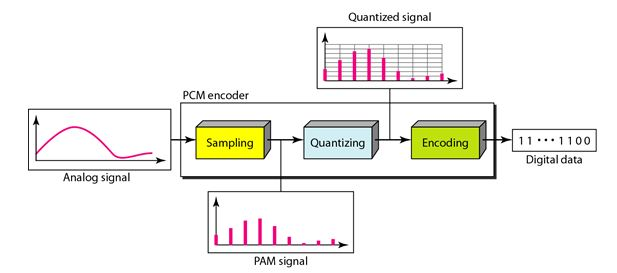

[Source](http://www.myreadingroom.co.in/notes-and-studymaterial/68-dcn/732-analog-to-digital-conversion-techniques.html)

- **Sampling**: El muestreo es la reducción de una señal continua a una discreta. Un ejemplo común es la conversión de una onda sonora (señal continua) en una secuencia de muestras (señal discreta).

- **Quantization**: La cuantificación es el proceso de mapear valores de entrada de un conjunto grande (a menudo continuo) a valores de salida de un conjunto más pequeño (contable), a menudo con un número finito de elementos. El enrutamiento y el truncamiento son ejemplos típicos de procesos de cuantificación.

- **Encoding**: Después de cuantificar cada muestra y determinar el número de bits por muestra, cada muestra puede convertirse en una palabra de código de nb-bits. El número de bits de cada muestra se determina a partir del número de niveles de cuantificación. Si el número de niveles de cuantificación es `L`, el número de bits es `nb=log2.L`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0, 11)
print(t)
x = (0.85) ** t

[ 0  1  2  3  4  5  6  7  8  9 10]


# Señal continua

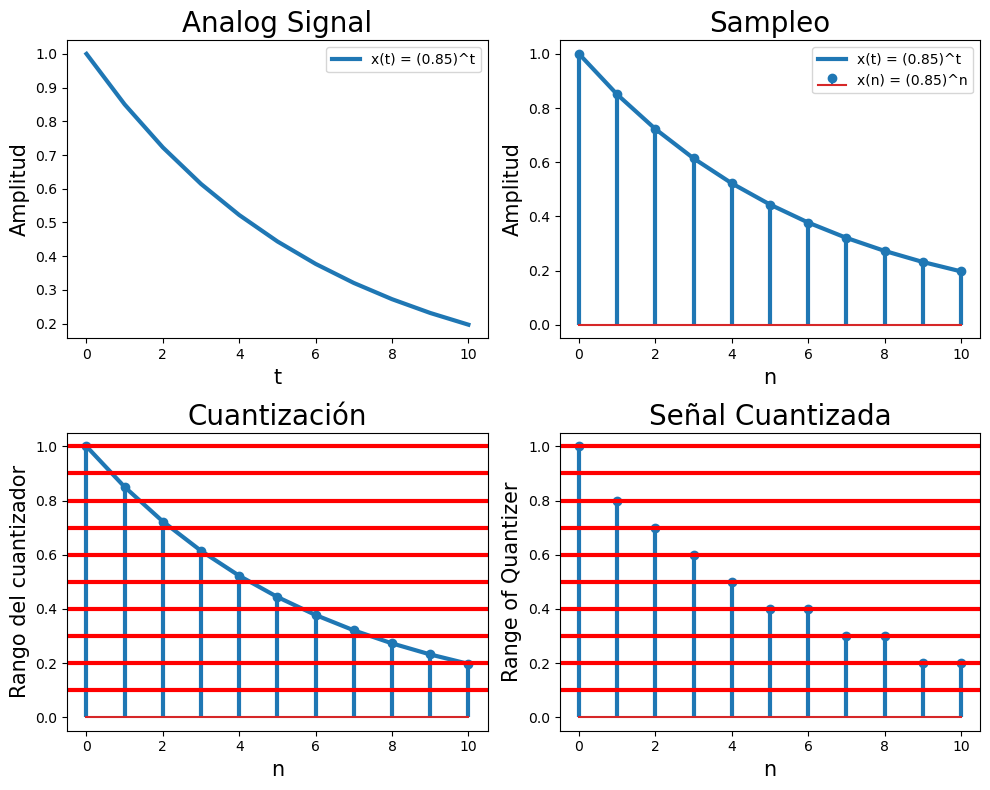

In [3]:
plt.figure(figsize = (10,8)) # tamaño de la figura

# 1. Gráfica señal análoga
plt.subplot(2, 2, 1)
plt.title('Analog Signal', fontsize=20)

plt.plot(t, x, linewidth=3, label='x(t) = (0.85)^t')
plt.xlabel('t' , fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(loc='upper right')

# 2. Muestreo y representación gráfica de la señal muestreada
plt.subplot(2, 2, 2)
plt.title('Sampleo', fontsize=20)
plt.plot(t, x, linewidth=3, label='x(t) = (0.85)^t')
n = t

markerline, stemlines, baseline = plt.stem(n, x, label='x(n) = (0.85)^n')
plt.setp(stemlines, 'linewidth', 3)
plt.xlabel('n' , fontsize = 15)
plt.ylabel('Amplitud', fontsize = 15)
plt.legend(loc='upper right')

# 3. Cuantización
plt.subplot(2, 2, 3)
plt.title('Cuantización', fontsize = 20)

plt.plot(t, x, linewidth =3)
markerline, stemlines, baseline=plt.stem(n,x)
plt.setp(stemlines, 'linewidth', 3)
plt.xlabel('n', fontsize = 15)
plt.ylabel('Rango del cuantizador', fontsize=15)

plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)

plt.subplot(2, 2, 4)
plt.title('Señal Cuantizada', fontsize = 20)
xq = np.around(x,1)
markerline, stemlines, baseline = plt.stem(n,xq)
plt.setp(stemlines, 'linewidth', 3) 
plt.xlabel('n', fontsize = 15)
plt.ylabel('Range of Quantizer', fontsize=15)

plt.axhline(y = 0.1, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.2, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.3, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.4, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.5, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.6, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.7, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.8, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 0.9, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)
plt.axhline(y = 1.0, xmin = 0, xmax = 10, color = 'r', linewidth = 3.0)

plt.tight_layout()

# Señal impulso unitario

In [4]:
import scipy
from scipy import signal

impulse = signal.unit_impulse(10, 'mid')
shifted_impulse = signal.unit_impulse(7, 2)

# Sine wave
t = np.linspace(0, 10, 100)
amp = 5 # Amplitud
f = 50
x = amp * np.sin(2 * np.pi * f * t)

# Exponential Signal
x_ = amp * np.exp(-t)

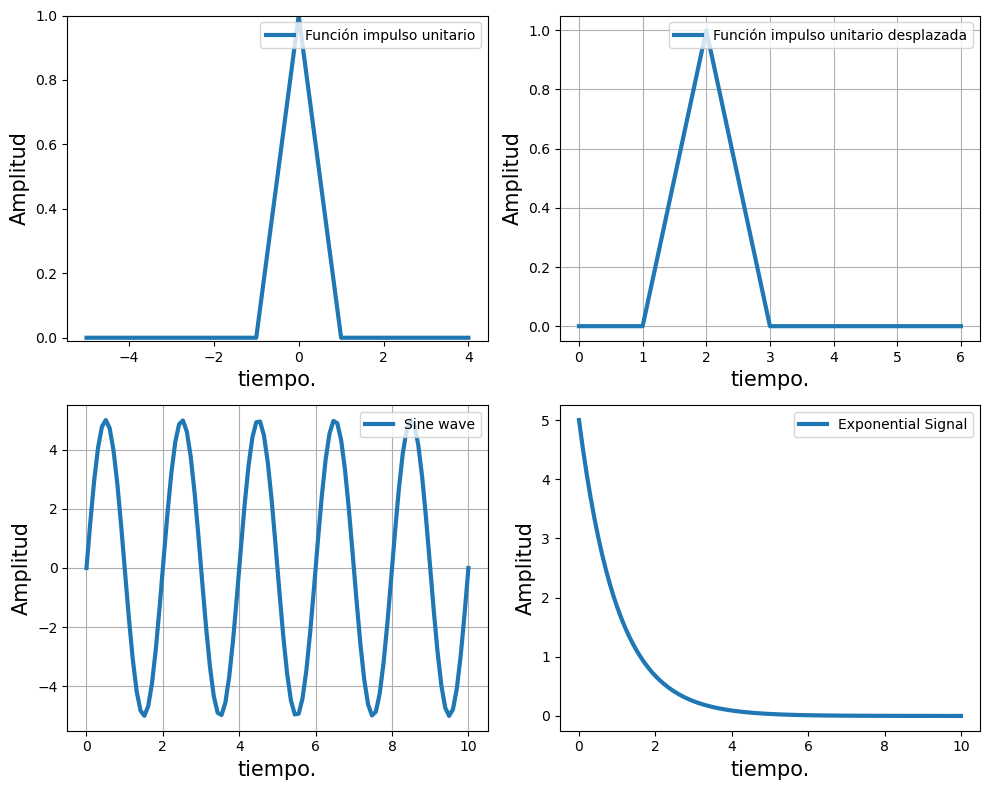

In [5]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(np.arange(-5, 5), impulse, linewidth=3, label='Función impulso unitario')
plt.ylim(-0.01,1)
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(shifted_impulse, linewidth=3, label='Función impulso unitario desplazada') 
plt.grid()
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 3)
plt.plot(t, x, linewidth=3, label='Onda seno'); plt.grid()

plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 4)
plt.plot(t, x_, linewidth=3, label='Senal exponencial'); plt.grid()

plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right'); plt.grid()
plt.tight_layout()

# Onda seno

In [6]:
# Onda seno
n = np.linspace(0, 10, 100)
amp = 5 # Amplitud
f = 50
x = amp * np.sin(2 * np.pi * f * n)

# Señal exponencial
x_ = amp * np.exp(-n)

# Señal discreta

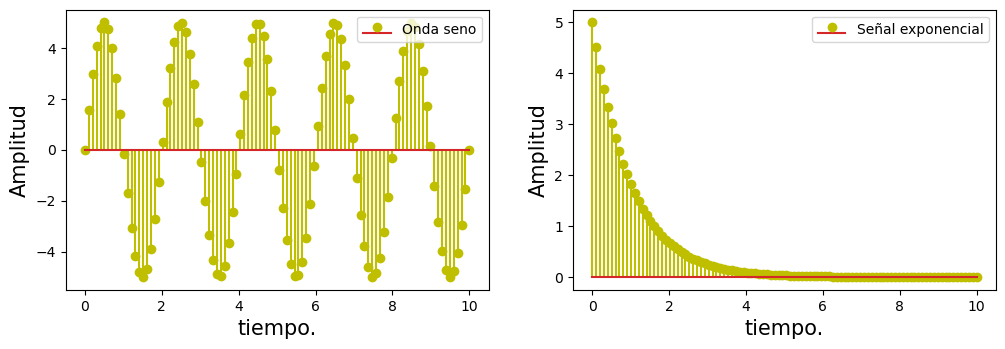

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.stem(n, x, 'yo', label='Onda seno')

plt.xlabel('tiempo.', fontsize=15); plt.ylabel('Amplitud', fontsize=15); plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2); plt.stem(n, x_, 'yo', label='Señal exponencial')

plt.xlabel('tiempo.', fontsize=15); plt.ylabel('Amplitud', fontsize=15); plt.legend(fontsize=10, loc='upper right')

# Transformadas de Fourier

La transformada de Fourier es una herramienta potente para analizar señales y se utiliza en diversos ámbitos, desde el procesamiento de audio hasta el procesamiento de imágenes y la compresión de imágenes.

El análisis de Fourier estudia cómo una función matemática se puede descomponer en una serie de funciones trigonométricas más simples. La transformada de Fourier es una herramienta de este campo para descomponer una función en las frecuencias que la componen. En otras palabras, la transformada de Fourier permite tomar una señal y ver la potencia de cada frecuencia. Observe los términos importantes de esta oración:
- Una señal es información que cambia con el tiempo. Por ejemplo, las trazas de audio, video y voltaje son ejemplos de señales.
- Una frecuencia es la velocidad a la que algo se repite. Por ejemplo, los relojes marcan el tiempo a una frecuencia de un hercio (Hz), o una repetición por segundo.
- La potencia, en este caso, simplemente significa la intensidad de cada frecuencia.

La siguiente imagen es una demostración visual de la frecuencia y la potencia en algunas ondas sinusoidales:

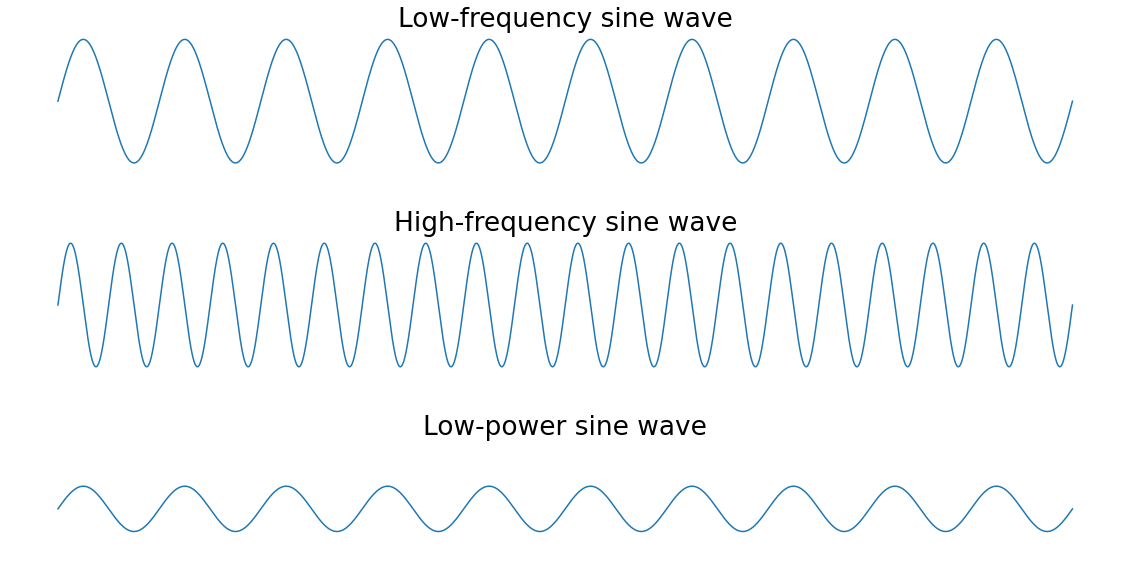

Los picos de la onda sinusoidal de alta frecuencia están más cerca entre sí que los de la onda sinusoidal de baja frecuencia, ya que se repiten con mayor frecuencia. La onda sinusoidal de baja potencia tiene picos más pequeños que las otras dos ondas sinusoidales.

# ¿Por qué se necesita la transformada de Fourier?

La transformada de Fourier es útil en muchas aplicaciones. La compresión de imágenes utiliza una variante de la transformada de Fourier para eliminar los componentes de alta frecuencia de las imágenes. El reconocimiento de voz utiliza la transformada de Fourier y transformadas relacionadas para recuperar las palabras habladas del audio sin procesar.

En general, se necesita la transformada de Fourier si se necesita observar las frecuencias de una señal. Si trabajar con una señal en el dominio del tiempo resulta difícil, vale la pena probar la transformada de Fourier para trasladarla al dominio de la frecuencia.

# ¿Qué es el Dominio de la Frecuencia?

El dominio de la frecuencia se refiere al espacio analítico donde las funciones o señales matemáticas se expresan en términos de frecuencia, en lugar de tiempo. Por ejemplo, mientras que un gráfico en el dominio del tiempo puede mostrar cambios a lo largo del tiempo, un gráfico en el dominio de la frecuencia muestra la cantidad de señal presente en cada banda de frecuencia dada. Sin embargo, es posible convertir la información del dominio del tiempo al dominio de la frecuencia. Un ejemplo de dicha transformación es la transformada de Fourier. La transformada de Fourier convierte la función temporal en un conjunto de ondas sinusoidales que representan diferentes frecuencias. La representación de una señal en el dominio de la frecuencia se conoce como espectro de componentes de frecuencia.

# ¿Cómo funciona el Dominio de la Frecuencia?
El dominio de la frecuencia permite representar el comportamiento cualitativo de un sistema, así como las características de su respuesta a cambios en el ancho de banda, la ganancia, el desfase, los armónicos, etc. Una disciplina donde se utiliza el dominio de la frecuencia para la representación gráfica es la música. A menudo, los productores e ingenieros de audio muestran una señal de audio dentro de un dominio de frecuencia para comprender mejor la forma y el carácter de una señal de audio.

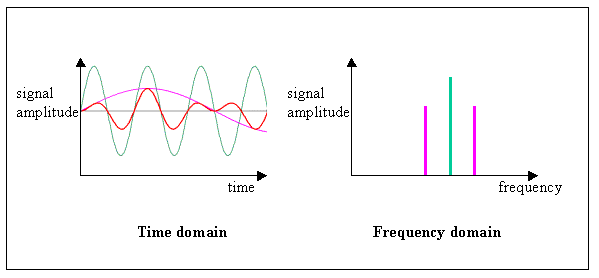

[source](https://knowledge.ni.com/KnowledgeArticleDetails?id=kA03q000000YGJ7CAO&l=en-US)

# Reconstrucción de Señales

En el procesamiento de señales, la reconstrucción suele significar la determinación de una señal continua original a partir de una secuencia de muestras equidistantes.

- Teorema de Muestreo de Shannon-Nyquist: Una función que no contiene una frecuencia superior a wHz se determina completamente mediante un muestreo a 2wHz.

# Teorema de Muestreo de Nyquist

El teorema de muestreo de Nyquist establece que «la frecuencia de muestreo fs debe ser mayor o igual al doble de la frecuencia máxima de la señal (señal continua) que se va a muestrear».

Si Fmax es la frecuencia máxima de la señal, entonces, según el teorema de muestreo: fs > 2Fmax
[fs] = [muestras/segundo]

Frecuencia de Nyquist: fN = fs/2 [muestras/segundo]

El teorema de muestreo es muy importante si queremos reconstruir la señal después del muestreo.

# Muestreo y reconstrucción

In [44]:
f = 20 # Hz
t = np.linspace(0, 0.5, 200)
x1 = np.sin(2 * np.pi * f * t)

s_rate = 100 # Hz. Aquí la frecuencia de muestreo es menor que el requisito del teorema de muestreo.

T_s = 1 / s_rate
n = np.arange(0, 0.5 / T)
nT = n * T
x2 = np.sin(2 * np.pi * f * nT) # Ya que para el muestreo t = nT.

In [45]:
print(T)
print(len(t))
print(len(nT_s))

0.016666666666666666
200


NameError: name 'nT_s' is not defined

/var/folders/30/ztpkmkzs3x93tr0tmbtvxwy80000gn/T/ipykernel_1880/1505840293.py:12: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(nT, x2, 'ro', label=['Marcas de muestra después del remuestreo a fs=35 Hz',s_rate])


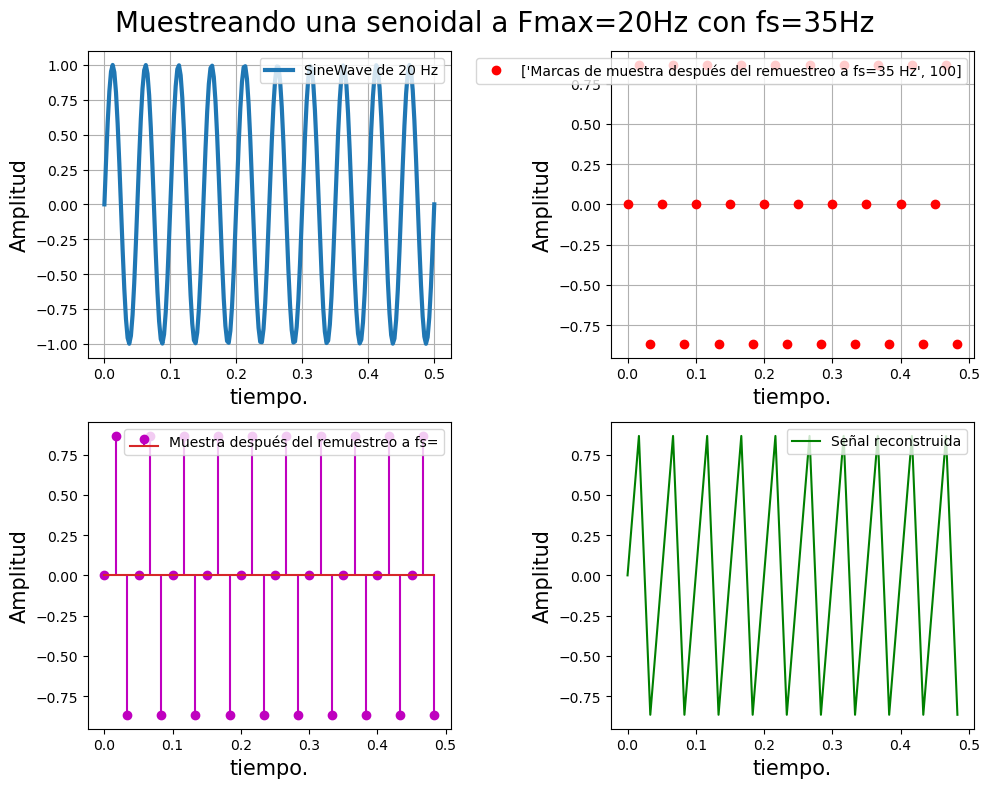

In [46]:
plt.figure(figsize=(10, 8))
plt.suptitle("Muestreando una senoidal a Fmax=20Hz con fs=35Hz", fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(t, x1, linewidth=3, label='SineWave de 20 Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(nT, x2, 'ro', label=['Marcas de muestra después del remuestreo a fs=35 Hz',s_rate])
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.grid()

plt.subplot(2, 2, 3)
plt.stem(nT, x2, 'm', label='Muestra después del remuestreo a fs=',)
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 4)
plt.plot(nT, x2, 'g-', label='Señal reconstruida')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')


plt.tight_layout()

# Frecuencia de muestreo mayor al doble de la frecuencia máxima (fs > 2fmax - `50Hz`)

In [11]:
f = 20 # Hz
t = np.linspace(0, 0.5, 200)
x1 = np.sin(2 * np.pi * f * t)

s_rate = 50 # Hz. Aquí la frecuencia de muestreo es menor que el requisito del teorema de muestreo.

T = 1 / s_rate
n = np.arange(0, 0.5 / T)
nT = n * T
x2 = np.sin(2 * np.pi * f * nT) # Ya que para el muestreo t = nT.

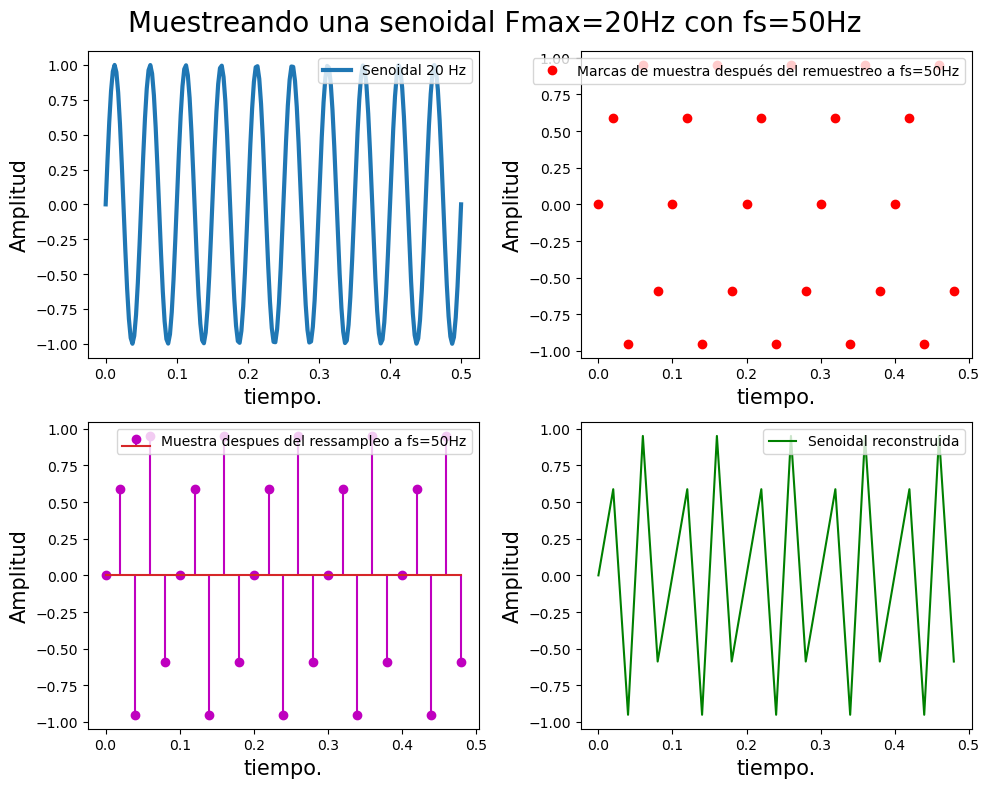

In [12]:
plt.figure(figsize=(10, 8))
plt.suptitle("Muestreando una senoidal Fmax=20Hz con fs=50Hz", fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(t, x1, linewidth=3, label='Senoidal 20 Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(nT, x2, 'ro', label='Marcas de muestra después del remuestreo a fs=50Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 3)
plt.stem(nT, x2, 'm', label='Muestra despues del ressampleo a fs=50Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 4)
plt.plot(nT, x2, 'g-', label='Senoidal reconstruida')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()

# Sampling Frequency greater than twice the maximum frequency (fs > 5fmax - `100Hz`) 

In [13]:
f = 20 # Hz
t = np.linspace(0, 0.5, 200)
x1 = np.sin(2 * np.pi * f * t)

s_rate = 100 # Hz. Aquí la frecuencia de muestreo es menor que el requisito del teorema de muestreo.

T = 1 / s_rate
n = np.arange(0, 0.5 / T)
nT = n * T
x2 = np.sin(2 * np.pi * f * nT) 

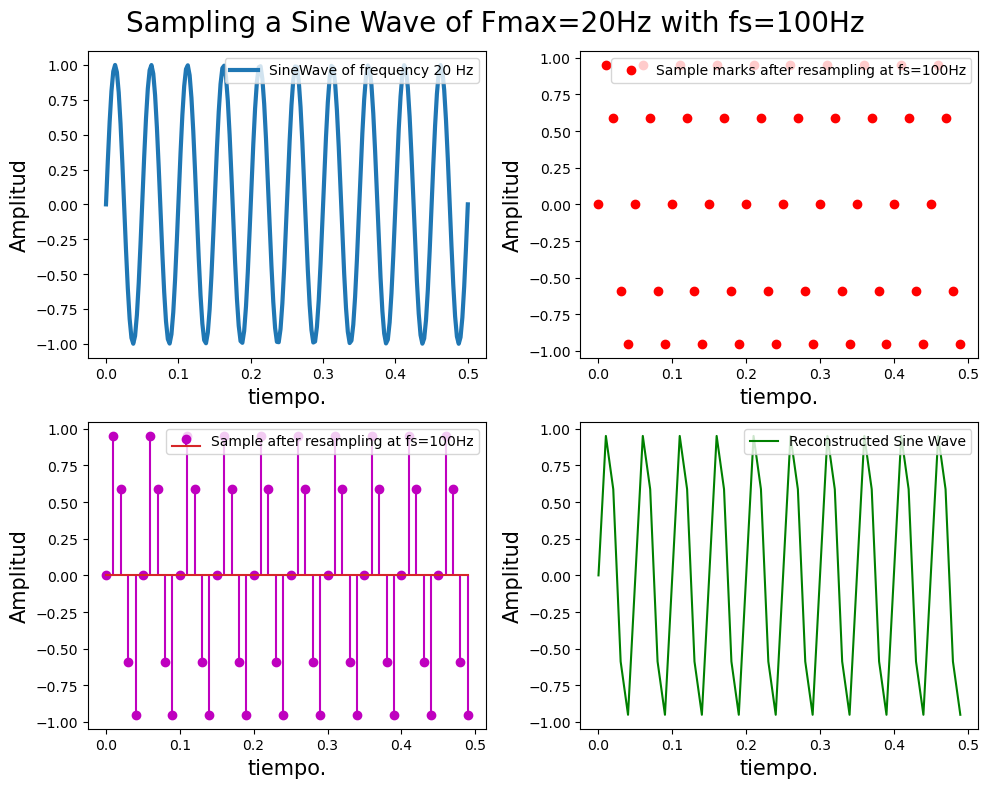

In [14]:
plt.figure(figsize=(10, 8))
plt.suptitle("Sampling a Sine Wave of Fmax=20Hz with fs=100Hz", fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(t, x1, linewidth=3, label='SineWave of frequency 20 Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(nT, x2, 'ro', label='Sample marks after resampling at fs=100Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 3)
plt.stem(nT, x2, 'm', label='Sample after resampling at fs=100Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 4)
plt.plot(nT, x2, 'g-', label='Reconstructed Sine Wave')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()

# Sampling and Reconstruction of sum of two sine waves

In [47]:
t = np.linspace(0, 0.5, 200)
x1 = 2 * np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)

s_rate = 41 # Hz. Here the sampling frequency is less than the requirement of sampling theorem

T = 1 / s_rate
n = np.arange(0, 0.5 / T)
nT = n * T
x2 = 2 * np.sin(2 * np.pi * 10 * nT) + np.sin(2 * np.pi * 20 * nT) # Since for sampling t = nT.

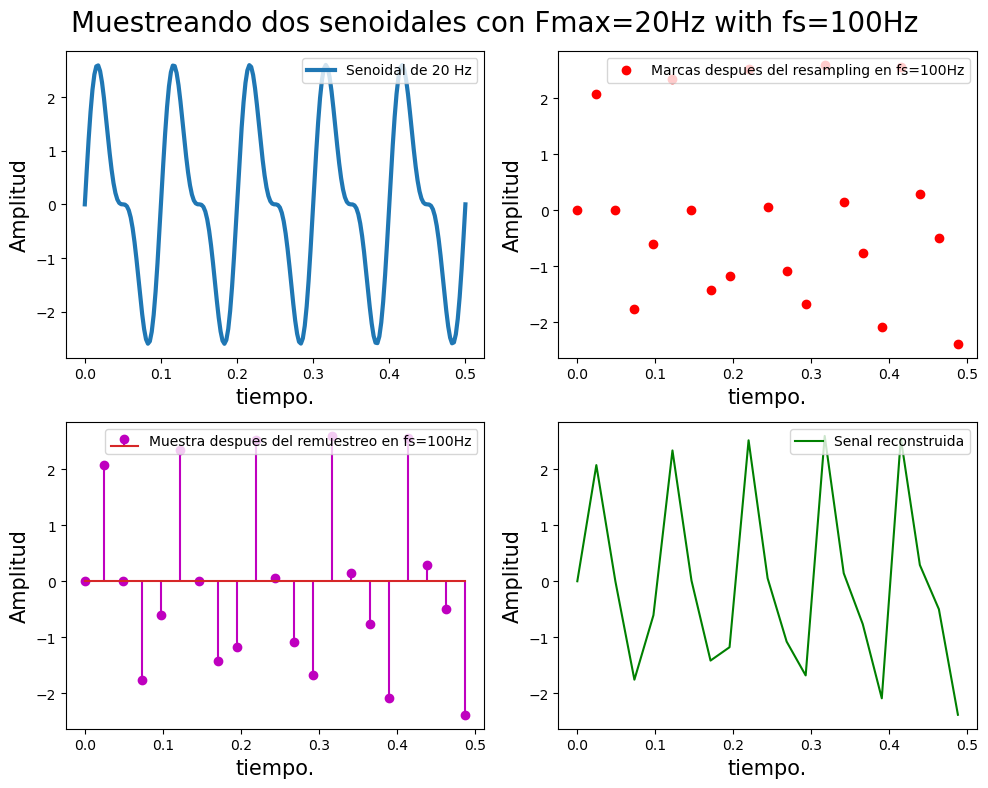

In [48]:
plt.figure(figsize=(10, 8))
plt.suptitle("Muestreando dos senoidales con Fmax=20Hz with fs=100Hz", fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(t, x1, linewidth=3, label='Senoidal de 20 Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(nT, x2, 'ro', label='Marcas despues del resampling en fs=100Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 3)
plt.stem(nT, x2, 'm', label='Muestra despues del remuestreo en fs=100Hz')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2, 2, 4)
plt.plot(nT, x2, 'g-', label='Senal reconstruida')
plt.xlabel('tiempo.', fontsize=15)
plt.ylabel('Amplitud', fontsize=15)
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()

In [49]:
# Define domain
dx = 0.001
L = np.pi
x = L * np.arange(-1 + dx, 1 + dx, dx)
n = len(x)
nquart = int(np.floor(n / 4))

In [50]:
# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4 / n) * np.arange(1, nquart + 1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4 / n) * np.arange(0, nquart)

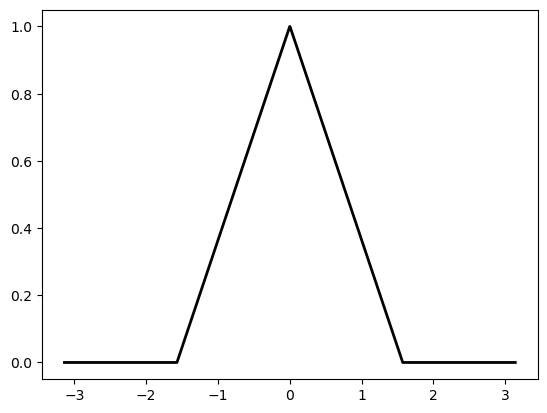

In [51]:
fig, ax = plt.subplots()
ax.plot(x, f, '-', color='k', linewidth=2)

In [20]:
# # Define domain
# dx = 0.001
# L = np.pi
# x = L * np.arange(-1 + dx, 1 + dx, dx)
# n = len(x)
# nquart = int(np.floor(n / 4))

# # Define hat function
# f = np.zeros_like(x)
# f[nquart:2*nquart] = (4 / n) * np.arange(1, nquart + 1)
# f[2*nquart:3*nquart] = np.ones(nquart) - (4 / n) * np.arange(0, nquart)

# fig, ax = plt.subplots()
# ax.plot(x, f, '-', color='k', linewidth=2)

# # Compute Fourier Series

# A0 = np.sum(f * np.ones_like(x)) * dx
# fFS = A0 / 2

# A = np.zeros(20)
# B = np.zeros(20)
# for k in range(20):
#     A[k] = np.sum(f * np.cos(np.pi * (k + 1) * x/L)) * dx
#     B[k] = np.sum(f * np.sin(np.pi * (k + 1) * x/L)) * dx
#     fFs = fFS + A[k] * np.cos((k + 1) * np.pi * x / L) + B[k] * np.sin((k + 1) * np.pi * x / L)
#     ax.plot(x, fFS, '-')

# Fenómeno de Gibbs

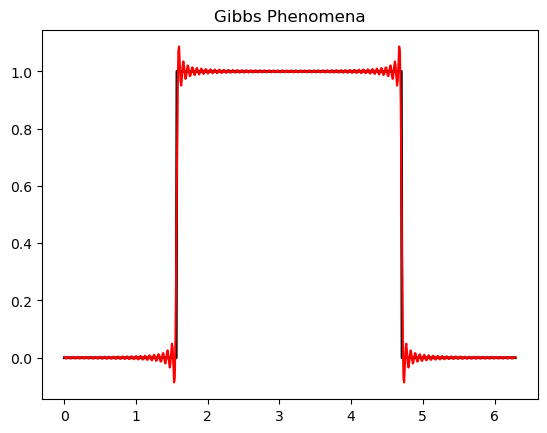

In [21]:
dx = 0.01
L = 2 * np.pi
x = np.arange(0, L + dx, dx)
n = len(x)
nquart = int(np.floor(n / 4))

f = np.zeros_like(x)
f[nquart:3 * nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0 / 2 * np.ones_like(f)

for k in range(1, 101):
    Ak = np.sum(f * np.cos(2 * np.pi * k * x / L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2 * np.pi * k * x / L)) * dx * 2 / L    
    fFS = fFS + Ak * np.cos(2 * k * np.pi * x / L) + Bk * np.sin(2 * k * np.pi * x / L)
    
plt.plot(x, f, color='k', linewidth=2)
plt.plot(x, fFS, '-', color='r', linewidth=1.5)
plt.title('Gibbs Phenomena')
plt.show()